# House Prices: Advanced Regression Techniques

En el archivo ***data_description.txt*** viene una descripción detallada de las variables de este dataset. La Info de este Notebook está en **[Kaggle](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)**.

El objetivo es predecir el precio de la venta de las casas que viene dado en la variable **SalePrice**.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [55]:
#Cargamos el dataset que usaremos para entrenar
df_train = pd.read_csv('dataset/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [23]:
#Vemos qué pinta tiene SalePrice
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

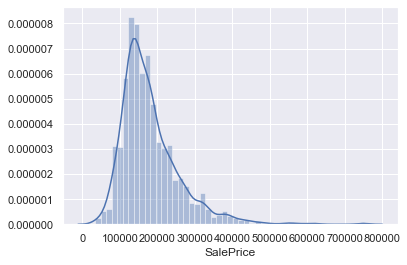

In [24]:
#Vemos su histograma
sns.distplot(df_train['SalePrice'])

Estudiamos el **sesgo** de la curva así como la **kurtosis**:

In [25]:
#skewness and kurtosis
print("Skewness: %f" %df_train['SalePrice'].skew()) #sesgo
print("Kurtosis: %f" %df_train['SalePrice'].kurt()) #kurtosis

Skewness: 1.882876
Kurtosis: 6.536282


* Nos sale un **sesgo** por encima de 0, lo que significa que cuánto más positivo es este valor más desplazada está la distribución hacía la izquierda (como podemos ver en el histograma), de modo que tenemos una asimetría positiva, nos queda la media muy por encima de la distribución (hacia la derecha).
* Nos sale una **kurtosis** *leptocúrtica* (>0), que equivale a una distribución donde se le concentran mucho los datos en el valor central, y apenas tiene cola.

## **$1.1$- Estudio con las variables relacionadas elegidas subjetivamente**

Vamos a considerar para empezar las variables que pueden estar más relacionadas con nuestra variable predictora de salida **SalePrice**. Tomamos dichas variables según nuestra lógica, más adelante se veran si hay más.

* Como variables *constructoras*:

     * ***OverallQual:*** Califica el material general y el acabado de la casa.
         * `10`-*Very Excellent*, `9`-*Excellent*, `8`-*Very Good*, `7`-*Good*, `6`-*Above Average*, `5`-*Average*, `4`-*Below Average*, `3`-*Fair*, `2`-*Poor*, `1`-*Very Poor*
       
     * ***YearBuilt:*** Fecha original de la construcción.
     
* Como variables *espaciales*: 
     * ***TotalBsmtSF:*** Total de pies cuadrados de área de sótano.

     * ***GrLivArea:*** Superficie habitable por encima del nivel del suelo (pies cuadrados).

### Relaciones entre las **variables numéricas** con SalePrice:

   SalePrice  GrLivArea
0     208500       1710
1     181500       1262
2     223500       1786
3     140000       1717
4     250000       2198


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


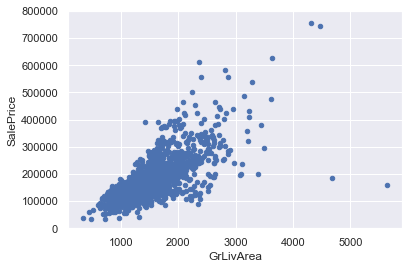

In [26]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1) #unimos por columna
print(data.head())
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


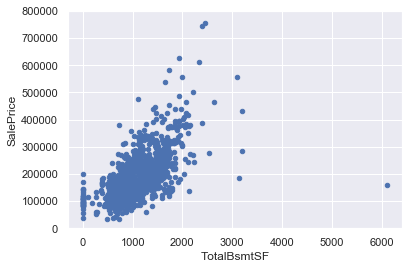

In [27]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

Vemos que ambas variables tienen una dependencia más o menos lineal con el precio de las casas, mucho más claro con la variable GrLivArea.

### Relaciones entre las **variables categóricas** con SalePrice:

(-0.5, 9.5, 0, 800000)

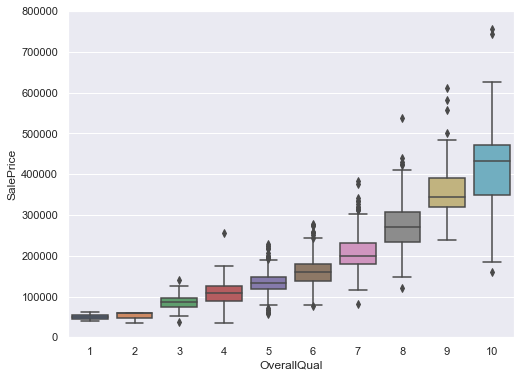

In [28]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

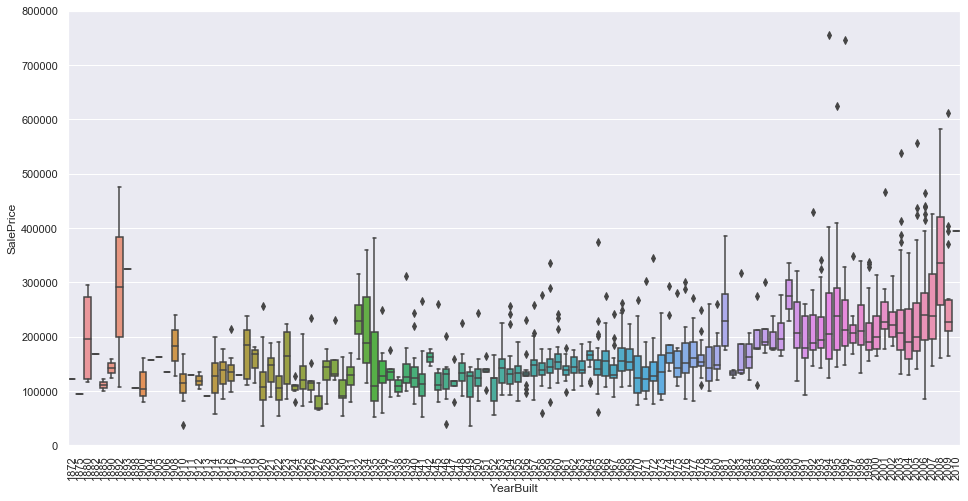

In [29]:
#box plot YearBuilt/saleprice
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90)

También vemos que estas variables categóricas están relacionadas con el precio de la vivienda.

## **$1.2$- Estudio con las variables relacionadas elegidas objetivamente**

### Matriz de correlación y mapa de calor

Con el mapa de calor pordremos echar un rápido vistazo para ver cuales son las variables más correlacionadas con el precio del piso

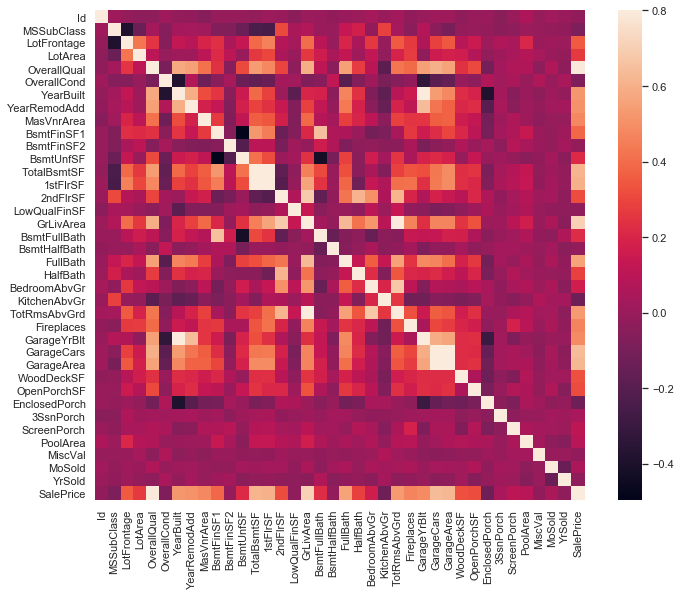

In [30]:
#correlation matrix
corrmat = df_train.corr() #matriz de correlación
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

* Observando esta *sopa de plasma* lo primero que llama la atención es la relación que hay entre ***TotalBsmtSF*** y ***1stFlrSF*** por un lado, y por otro lado las variables ***GarageCars*** y ***GarageArea***. Todo esto nos puede indicar que existe una multicolinealidad entre estas variables. 
* También observamos que no íamos desencaminados en elegir las variables relacionadas con **SalePrice**, auqnue vemos otras que no habíamos incluido.

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


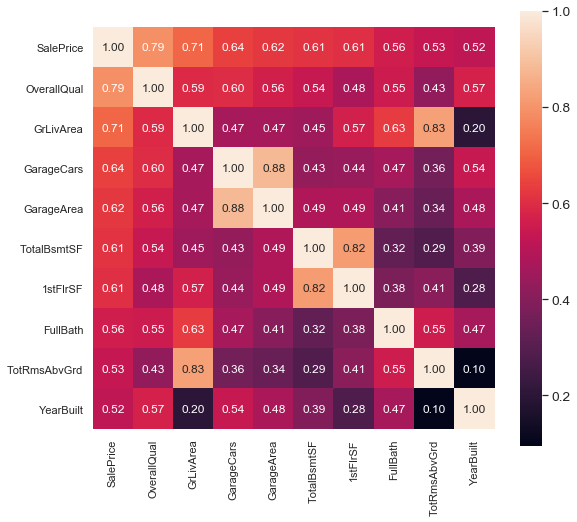

In [31]:
#saleprice correlation matrix

k = 10 #number of variables for heatmap

#buscamos las 9 variables más relacionadas con SalePrice y con index nos devuelve el nombre de esas variables
#ordenadas según su correlación
cols = corrmat.nlargest(k, 'SalePrice').index
print(cols)

cm = np.corrcoef(df_train[cols].values.T) #Devuelve los coeficientes de correlación producto-momento de Pearson(ver teoria)
f, ax = plt.subplots(figsize=(9, 8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Verficamos lo dicho anteriormente...y comprobamos que también hay una multicolinealidad entre *'TotalBsnmtSF'* y *'1stFlrSF'* y entre *'TotRmsAbvGrd'* y *'GrLivArea'*.

Por todo ello nos vamos a quedar finalmente con las variables ***SalePrice***, ***OverallQual***, ***GrLivArea***, ***GarageCars***, ***TotalBsmtSF***, ***FullBath*** y ***YearBuilt***.

## **$2$- ScatterPlot entre SalePrice y las variables correlacionadas**

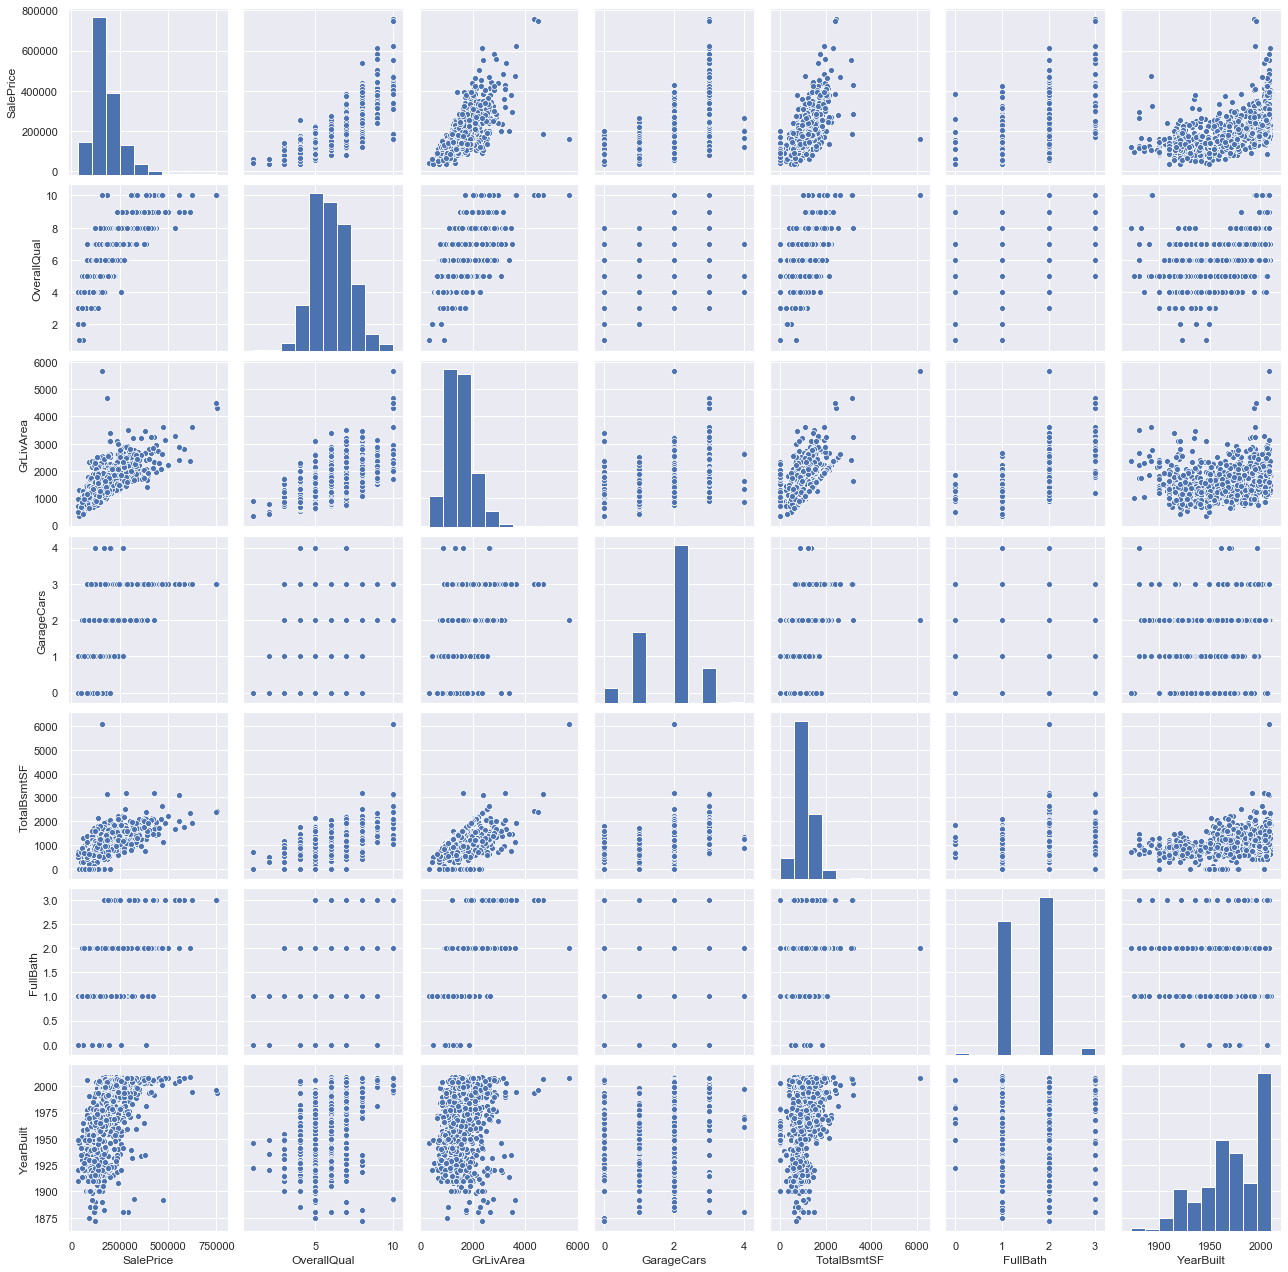

In [32]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

* Observamos que el ***GrLivArea*** y el ***TotalBsmtSF*** tienen una dependencia casi lineal, esto tiene sentido ya que el área de un sotano deberá ser parecido al de la superficie de la planta de la casa.
* También observamos como los precios de las casas han aumentado casi exponencialmente para las casas de obra nueva (2010).

## **$3$- Datos perdidos**

### N/A o nulos

In [33]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = ((df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False))*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


Vamos a considerar que todas las variables que tienen más de un `15%` de datos perdidos las vamos a obviar. Rspecto al resto, las de Garage pese a estar en un `5,54%` las obviaremos porque como hemos visto antes lo importante para un garaje es el área(*GarageCars*). REspecto al resto de las variables con datos perdidos aplicamos la misma lógica, las consideramos irrelevantes para nuestro propósito, exceptuando ***Electrical***, que al tener solo una observación perdida nos lo quedaremos para ver qué pasa.

In [34]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index) #borramos la observación perdida de Electrical
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

## **$4$- Outliers o valores atípicos**

Los outliers pueden afectar notablemente nuestros modelos y pueden ser una valiosa fuente de información sobre comportamientos específicos.

### Análisis univariante

Lo primero será establecer un *threshold* que defina una observación como un *outlier*. Para ello primero standarizaremos los datos, lo que significa que obtendremos una media de $\mu=0$ y una desviación standard de $\sigma=1$:

In [35]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


Los *Low Range* están cerca del `0`, pero los *High Range* están lejos del `0`. Por ahora no consideraremos estos outliers, pero estaremos atentos.

### Análisis Bivariante

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


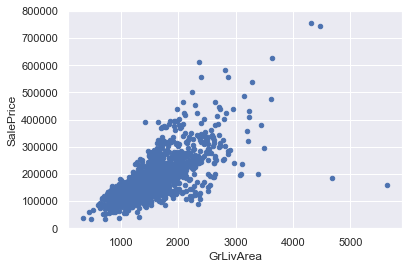

In [36]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

Eliminamos los dos outliers que vemos a la derecha con precio bajo, ya que no sigue la tendencia lineal que parecen seguir el resto.

In [37]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


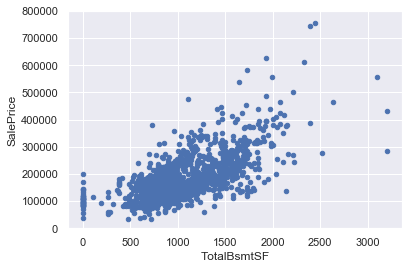

In [38]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

Vemos que no hay ouliers significativos.

## **$5$- Técnicas estadísticas multivariantes para SalesPrice**

### Normalidad

Cuando hablamos de *normalidad*, lo que queremos decir es que los datos deberían verse como una **distribución normal**. Esto es importante porque varias pruebas estadísticas se basan en esto (por ejemplo, *t-student*). 

Hay que recordar que la normalidad univariante no garantiza la normalidad multivariada (que es lo que nos gustaría tener), pero ayuda. Otro detalle a tener en cuenta es que en muestras grandes (> 200 observaciones) la distribución normal no es un problema. Sin embargo, si resolvemos la normalidad, evitamos muchos otros problemas como por ejemplo la *heterocedacidad* (si los datos de los errores de los residuos NO tienen la misma varianza), por lo que esa es la razón principal por la que estamos haciendo este análisis.

**- Verificamos la normalidad univariante para *SalePrice*:**

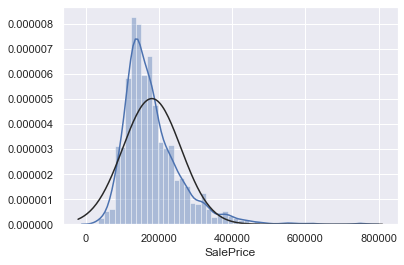

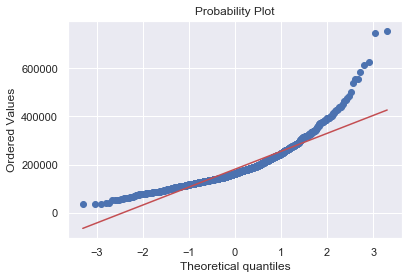

In [42]:
#histogram and normal probability plot

#histograma con un ajuste normal
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()

#Calculo de los cuantiles para una gráfica de probabilidad
res = stats.probplot(df_train['SalePrice'], plot=plt)

* Vemos que la gráfica superior no se ajusta a una normal y tiene un sesgo positivo.
* Viendo la gráfica inferior podemos ver que no sigue una relación lineal lo que nos indicaría que el residuo de sus errores no siguen una distribución normal.

Sabemos según la teoría que para distribuciones con un sesgo positivo podemos aplicarle una transformación logarítmica y obtendremos una relación lineal de los residuos de los errores:

In [43]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

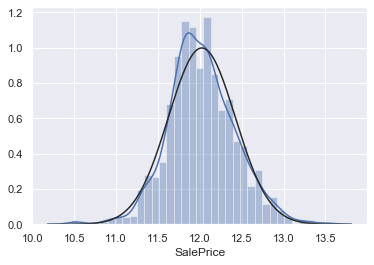

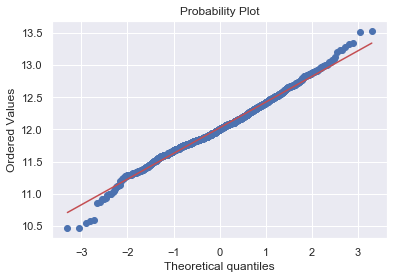

In [44]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

**- Verificamos la normalidad univariante para *GrLivArea*:**

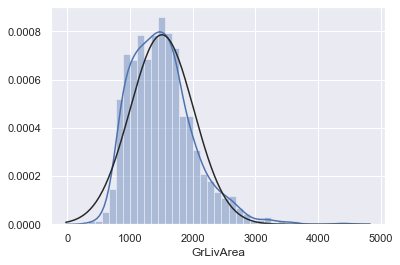

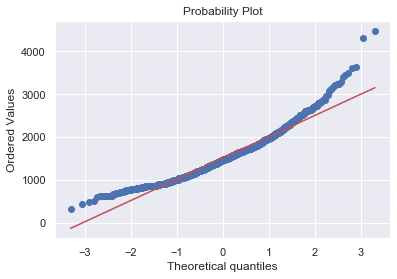

In [45]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Vemos que le pasa lo mismo que en *SalePrice* con un sesgo positivo, por lo aplicamos también una transformación logarítmica:

In [46]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

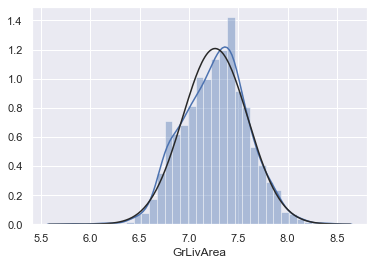

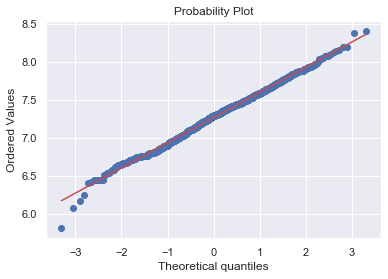

In [47]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

**- Verificamos la normalidad univariante para *TotalBsmtSF*:**

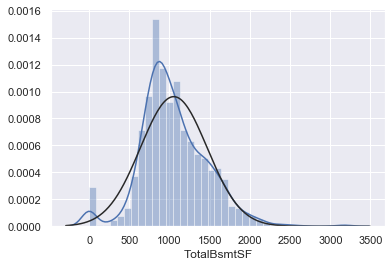

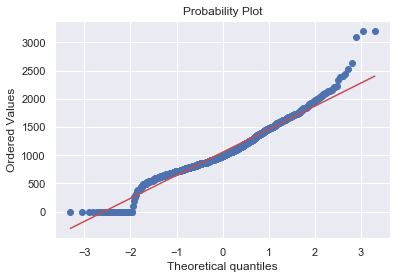

In [48]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

* Vemos que tenemos muchas observaciones con casas sin sotanos *(`0` pies cuadrados)*....lo que nos impide realizar una transformación logarítmica ya que el logarítmo no acepta el `0`.
* Para sortear esto crearemos una nueva variable que diga si la casa tiene sotano o no, y aplicaremos la regresión logarítmica en aquellas que tengan sotano.

In [49]:
#create column for new variable (one is enough because it's a binary categorical feature)

#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [51]:
#log transform data for houses with basement
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

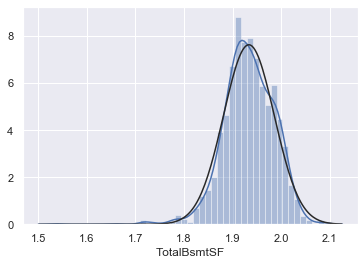

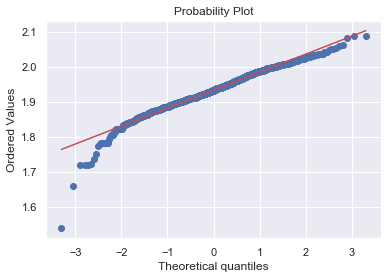

In [52]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

## Homocedasticidad

Se produce cuando todas las varianzas de los errores cometidos no siguen un patrón definido, lo que indica que la hipótesis de que todos los datos tienen la misma varianza es buena, y por lo tanto la regresión es una buena técnica para modelar estos datos. Si siguieran algún patrón se llamaría *Heterodasticidad*.

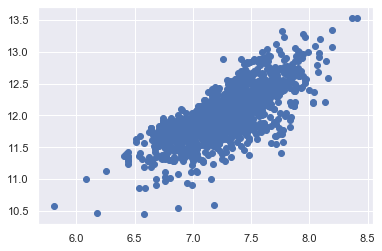

In [53]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

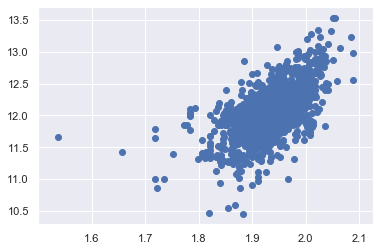

In [54]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);
